In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
#Store the data into a variable 
import csv

fname = "AAPL.csv"
file = pd.read_csv(fname)

file = file.set_index(pd.DatetimeIndex(file['Date'].values))
file

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-21,2019-11-21,65.922501,66.002502,65.294998,65.502502,64.414268,121395200
2019-11-22,2019-11-22,65.647499,65.794998,65.209999,65.445000,64.357727,65325200
2019-11-25,2019-11-25,65.677498,66.610001,65.629997,66.592499,65.486168,84020400
2019-11-26,2019-11-26,66.735001,66.790001,65.625000,66.072502,64.974815,105207600
2019-11-27,2019-11-27,66.394997,66.995003,66.327499,66.959999,65.847565,65235600
...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,118.919998,120.989998,118.150002,120.300003,120.300003,91183000
2020-11-17,2020-11-17,119.550003,120.669998,118.959999,119.389999,119.389999,74271000
2020-11-18,2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100
2020-11-19,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000


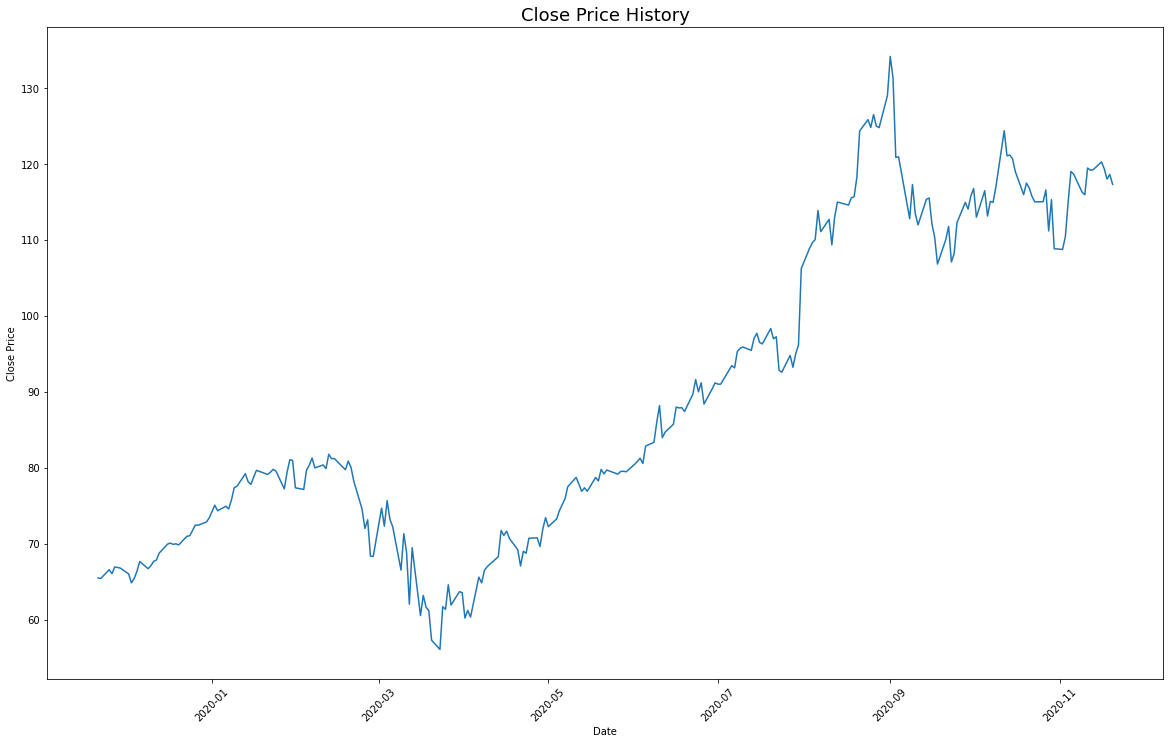

In [5]:
#Visually show the close price

plt.figure(figsize=(20,12))
plt.title('Close Price History', fontsize=18)
plt.xticks(rotation = 45)
plt.plot(file['Close'], label='Close')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)
plt.show()

In [6]:
#Calculate the MACD and signal line indicators 

#Short term exponetial moving average (EMA)
ShortEMA = file.Close.ewm(span = 12, adjust = False).mean()
#Long term exponential moving average (EMA)
LongEMA = file.Close.ewm(span = 26, adjust = False).mean()

#MACD Line 
MACD = ShortEMA - LongEMA 
#Signal Line 
signal = MACD.ewm(span = 9, adjust = False).mean()

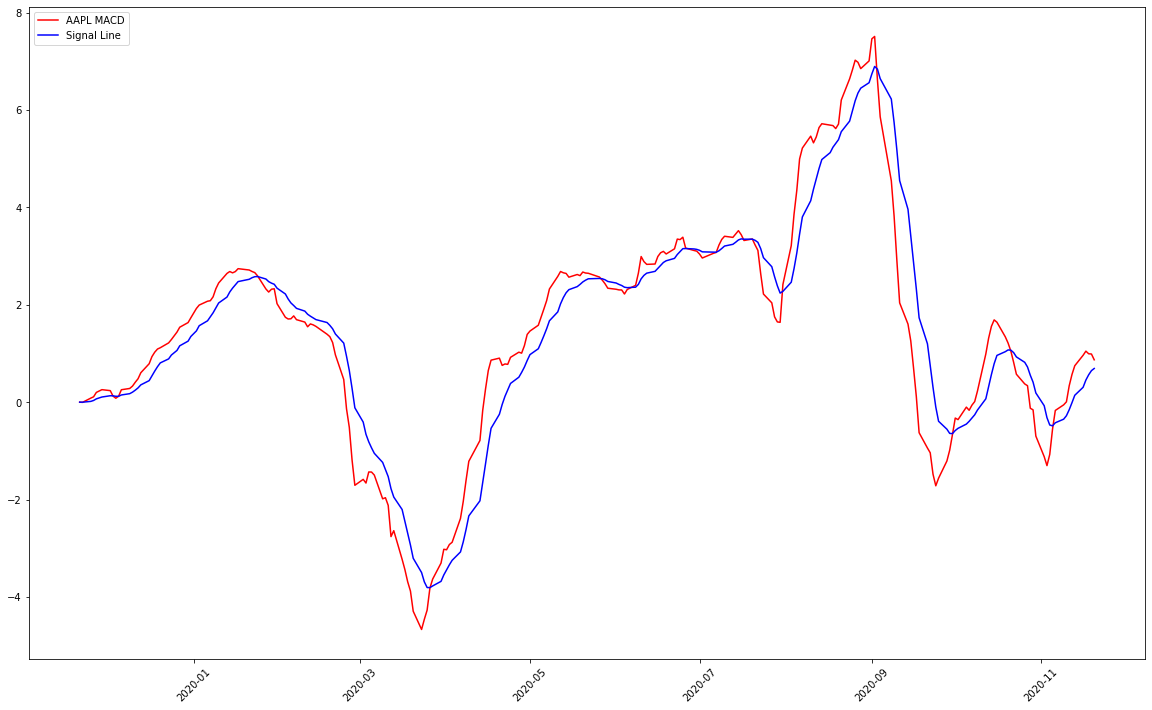

In [9]:
#Plot the chart 

plt.figure(figsize=(20,12))
plt.plot(file.index, MACD, label = 'AAPL MACD', color = 'red')
plt.plot(file.index, signal, label = 'Signal Line', color = 'blue')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left')
plt.show()

In [10]:
file['MACD'] = MACD
file['Signal Line'] = signal
file 

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2019-11-21,2019-11-21,65.922501,66.002502,65.294998,65.502502,64.414268,121395200,0.000000,0.000000
2019-11-22,2019-11-22,65.647499,65.794998,65.209999,65.445000,64.357727,65325200,-0.004587,-0.000917
2019-11-25,2019-11-25,65.677498,66.610001,65.629997,66.592499,65.486168,84020400,0.083410,0.015948
2019-11-26,2019-11-26,66.735001,66.790001,65.625000,66.072502,64.974815,105207600,0.109921,0.034743
2019-11-27,2019-11-27,66.394997,66.995003,66.327499,66.959999,65.847565,65235600,0.200237,0.067842
...,...,...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,118.919998,120.989998,118.150002,120.300003,120.300003,91183000,0.963029,0.305531
2020-11-17,2020-11-17,119.550003,120.669998,118.959999,119.389999,119.389999,74271000,1.047876,0.454000
2020-11-18,2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100,0.993920,0.561984
2020-11-19,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000,0.988981,0.647383


In [11]:
#Create a function to signal when to buy and sell an asset 

def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1 
    
    for i in range(len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else: 
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0 
            else: 
                Sell.append(np.nan)
        else: 
            Buy.append(np.nan)
            Sell.append(np.nan)
    
    return (Buy, Sell)

In [12]:
#Create buy and sell column 

file['Buy Signal'] = buy_sell(file)[0]
file['Sell Signal'] = buy_sell(file)[1]
file

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy Signal,Sell Signal
2019-11-21,2019-11-21,65.922501,66.002502,65.294998,65.502502,64.414268,121395200,0.000000,0.000000,NaN,NaN
2019-11-22,2019-11-22,65.647499,65.794998,65.209999,65.445000,64.357727,65325200,-0.004587,-0.000917,NaN,65.445
2019-11-25,2019-11-25,65.677498,66.610001,65.629997,66.592499,65.486168,84020400,0.083410,0.015948,66.592499,NaN
2019-11-26,2019-11-26,66.735001,66.790001,65.625000,66.072502,64.974815,105207600,0.109921,0.034743,NaN,NaN
2019-11-27,2019-11-27,66.394997,66.995003,66.327499,66.959999,65.847565,65235600,0.200237,0.067842,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,118.919998,120.989998,118.150002,120.300003,120.300003,91183000,0.963029,0.305531,NaN,NaN
2020-11-17,2020-11-17,119.550003,120.669998,118.959999,119.389999,119.389999,74271000,1.047876,0.454000,NaN,NaN
2020-11-18,2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100,0.993920,0.561984,NaN,NaN
2020-11-19,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000,0.988981,0.647383,NaN,NaN


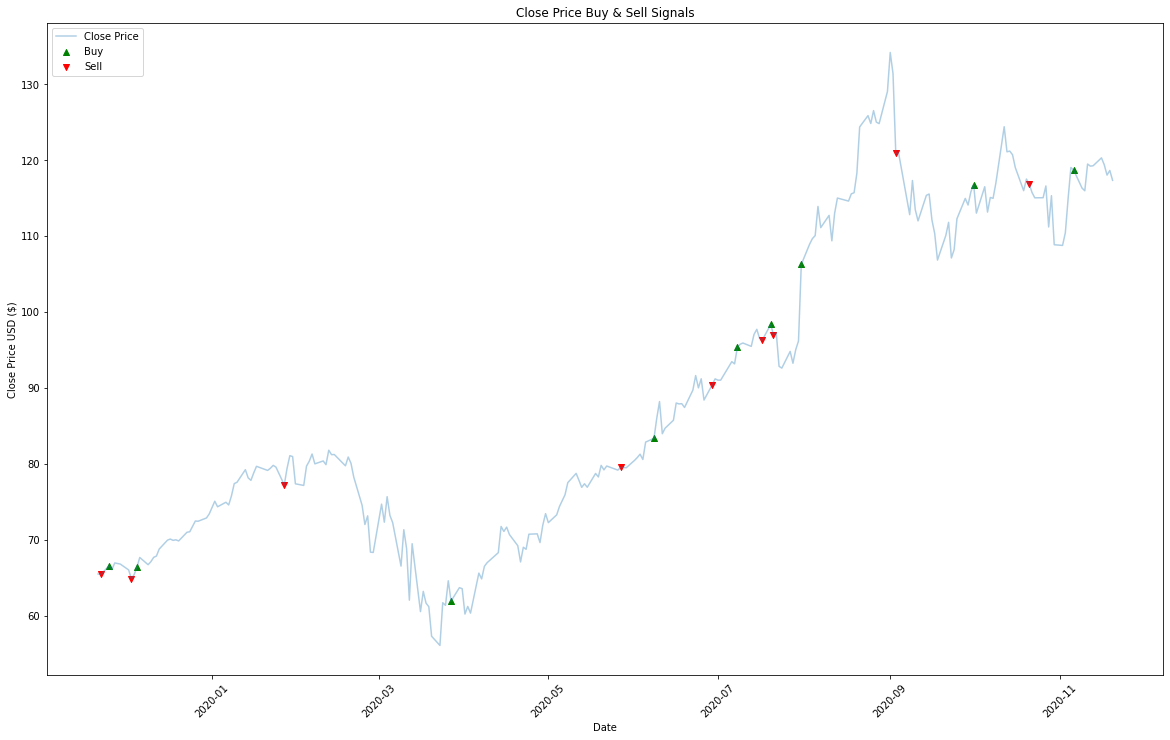

In [14]:
plt.figure(figsize=(20,12))
plt.scatter(file.index, file['Buy Signal'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(file.index, file['Sell Signal'], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(file['Close'], label = 'Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()